## Vietnam Housing Dataset (Hanoi)

**Introduction**

This is **a real estate price dataset in Hanoi**, with unit prices in **Million VND per square meter (m²)**. Some basic information: <br>

1. The objective is to build a machine learning model to predict real estate prices in Hanoi based on the provided basic information.
2. The dataset includes **13 fields** and **82,497 rows** of data.
3. All data columns are categorical.
4. The dataset contains many missing data entries.
5. Additionally, other issues such as duplicates, high cardinality, and high imbalance also need to be addressed.


**Basic Information of Data Fields**:

1. **District**: The location of the property, including districts in Hanoi city.
2. **Ward**: A smaller administrative unit than a district, where the property is located.
3. **Street**: The name of the specific street or area where the property is situated.
4. **Property Type**: The specific type of property (e.g., private house, townhouse, apartment).
5. **Area (m²)**: The floor area of the property.
6. **Price (Million VND/m²)**: The unit price of the property in Million VND per square meter.
7. **House Orientation**: The direction that the property faces (e.g., East, West, South, North).
8. **Number of Floors**: The number of floors in the house or building.
9. **Number of Bedrooms**: The number of bedrooms in the property.
10. **Number of Bathrooms**: The number of bathrooms in the property.
11. **Legal Status**: The legal status of the property (e.g., red book, pink book).
12. **Year of Construction**: The year the property was built or completed.
13. **Interior Condition**: The level of interior finishing of the property (e.g., basic interior, fully furnished, unfinished).

These data fields provide key characteristics to build a model for predicting real estate prices based on factors such as location, area, and property features.


### Data Preproccessing

![alt_text](./static/steps_for_data_preprocessing-f.png)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from common_function import example
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [6]:

df = pd.read_csv('./data_source/VN_housing_dataset.csv')
df

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,8/5/2020,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,8/5/2020,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,8/5/2020,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,8/5/2020,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,8/5/2020,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...
82491,8/23/2019,"Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc ...",Quận Bắc Từ Liêm,Phường Phúc Diễn,Nhà phố liền kề,NaN,NaN,3 phòng,38 m²,NaN,NaN,"81,58 triệu/m²"
82492,8/7/2019,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,50 m²,NaN,NaN,292 triệu/m²
82493,8/7/2019,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4 phòng,41 m²,NaN,NaN,"341,46 triệu/m²"
82494,8/5/2019,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà ngõ, hẻm",Đã có sổ,NaN,4 phòng,60 m²,NaN,NaN,"101,67 triệu/m²"


#### I. Data Profiling

Number of rows: 82496
Number of columns: 12

Column 1: Ngày
Distinct Values: 173
Distict values (%):  0.21091931730023275
Missing values: 0


/tmp/ipykernel_11188/911489053.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Missing values:", missing[i])


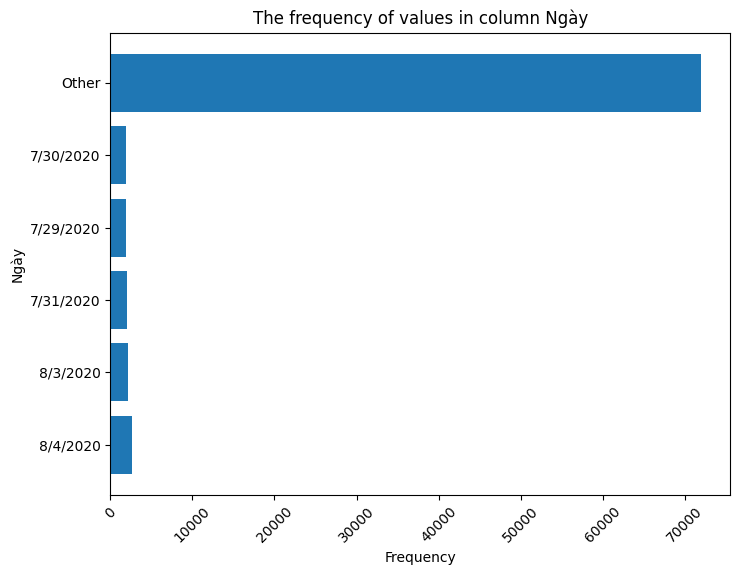


Column 2: Địa chỉ
Distinct Values: 13957
Distict values (%):  16.92925323533336


/tmp/ipykernel_11188/911489053.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Missing values:", missing[i])


Missing values: 47


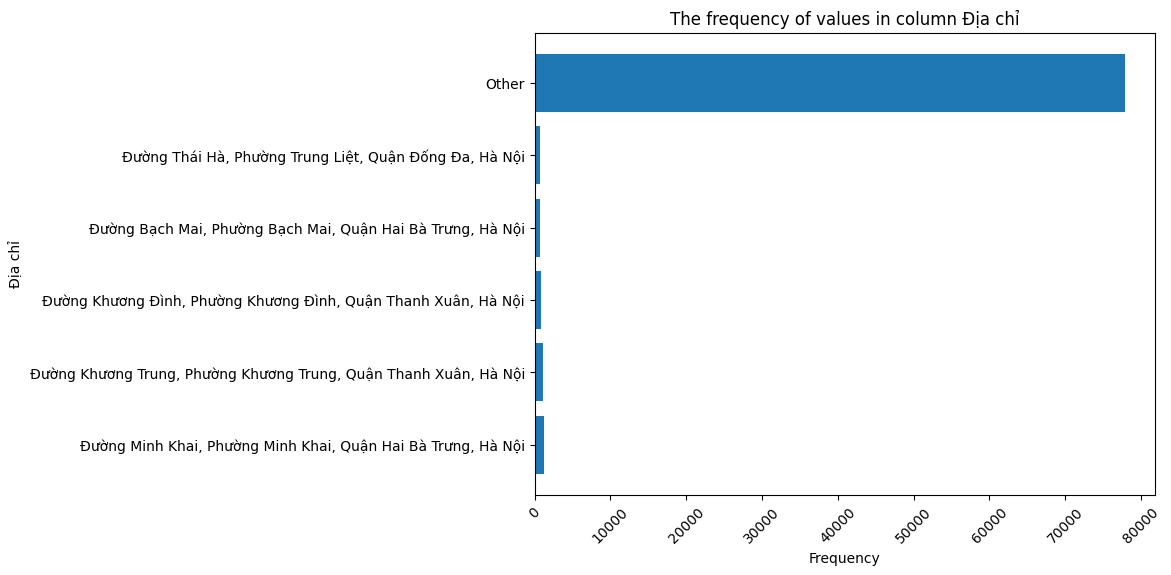


Column 3: Quận
Distinct Values: 29
Distict values (%):  0.03636584035396084
Missing values: 1


/tmp/ipykernel_11188/911489053.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Missing values:", missing[i])


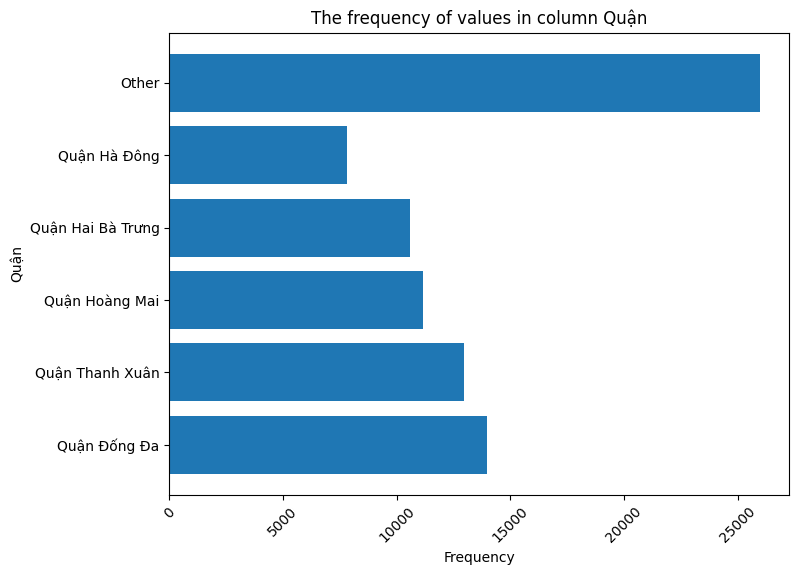


Column 4: Huyện
Distinct Values: 309
Distict values (%):  0.3759900059430678
Missing values: 47


/tmp/ipykernel_11188/911489053.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Missing values:", missing[i])


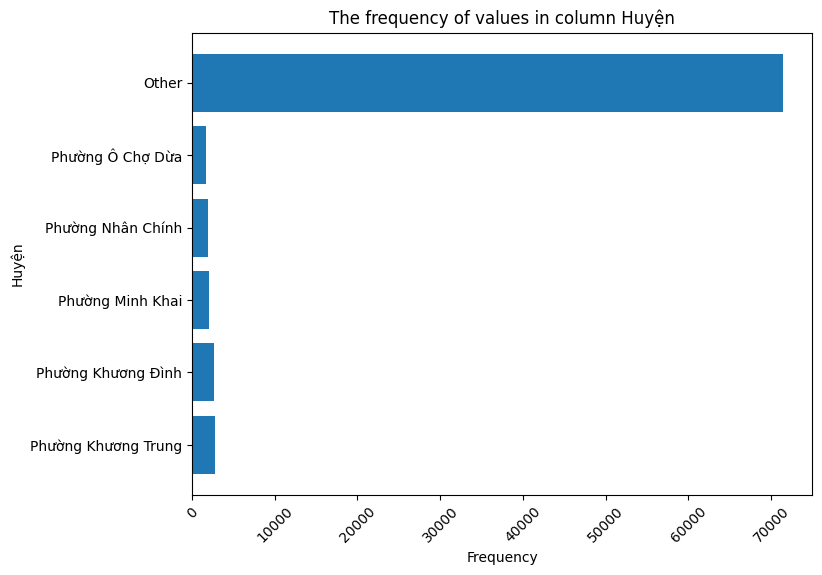


Column 5: Loại hình nhà ở
Distinct Values: 4
Distict values (%):  0.006063178318074334
Missing values: 31


/tmp/ipykernel_11188/911489053.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Missing values:", missing[i])


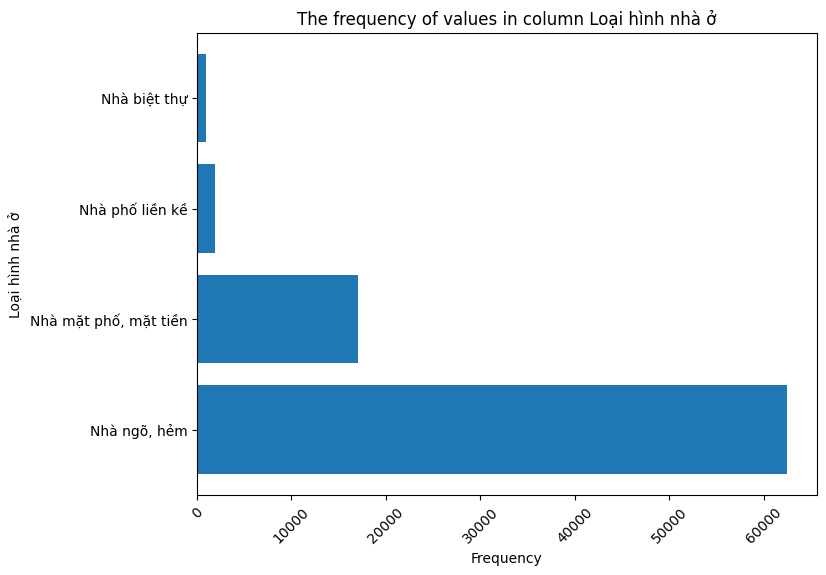


Column 6: Giấy tờ pháp lý
Distinct Values: 3
Distict values (%):  0.007461294534601753


/tmp/ipykernel_11188/911489053.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Missing values:", missing[i])


Missing values: 28886


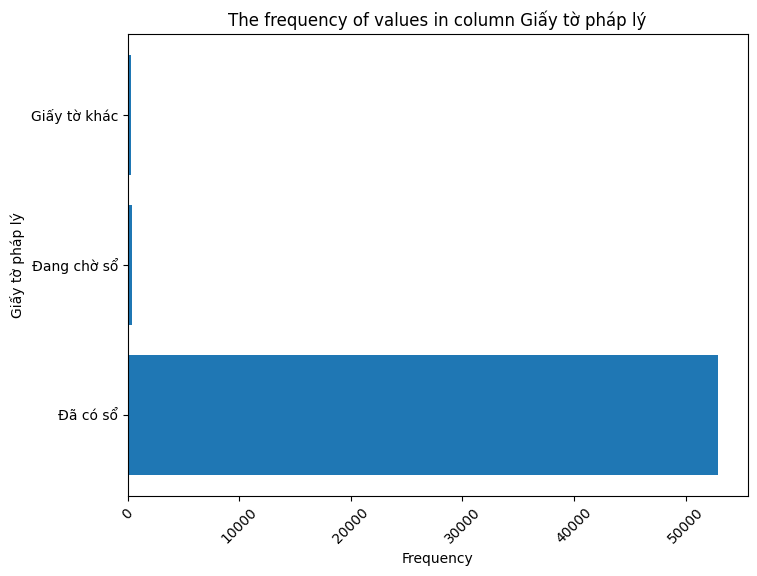


Column 7: Số tầng
Distinct Values: 29
Distict values (%):  0.08241984669908514


/tmp/ipykernel_11188/911489053.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Missing values:", missing[i])


Missing values: 46097


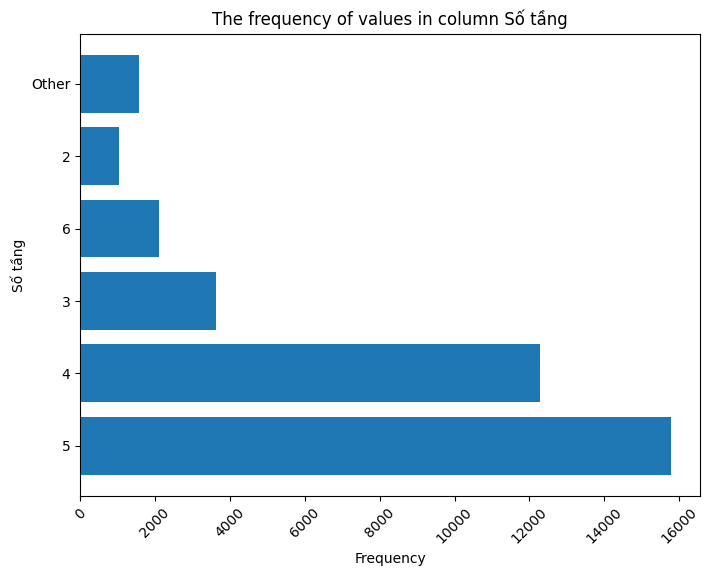


Column 8: Số phòng ngủ
Distinct Values: 11
Distict values (%):  0.014552863275849523


/tmp/ipykernel_11188/911489053.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Missing values:", missing[i])


Missing values: 38


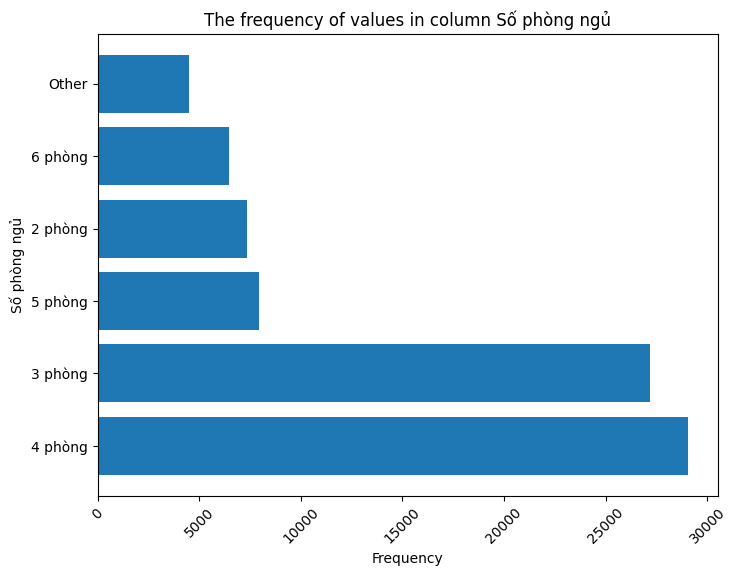


Column 9: Diện tích
Distinct Values: 504
Distict values (%):  0.6121583126250075


/tmp/ipykernel_11188/911489053.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Missing values:", missing[i])


Missing values: 1


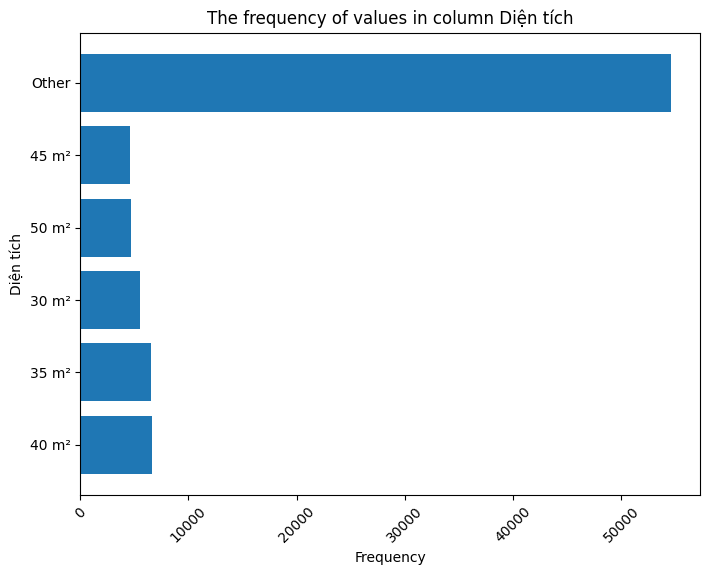


Column 10: Dài
Distinct Values: 487
Distict values (%):  2.4612901598829877
Missing values: 62669


/tmp/ipykernel_11188/911489053.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Missing values:", missing[i])


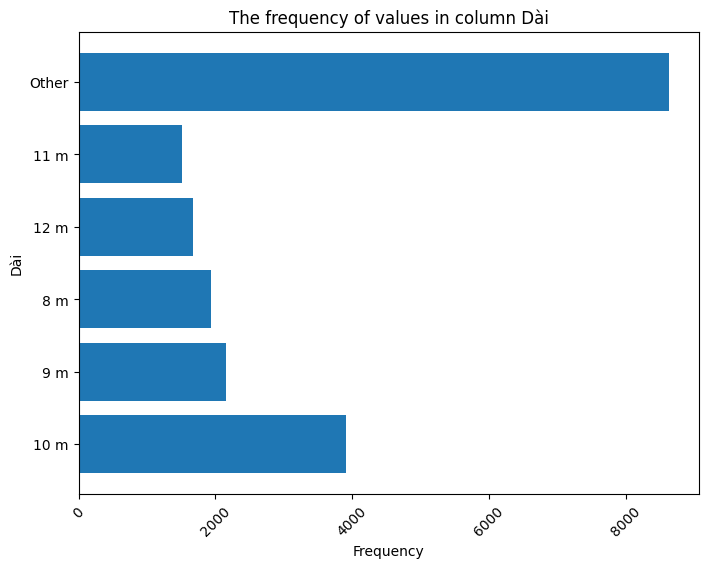


Column 11: Rộng
Distinct Values: 410
Distict values (%):  1.1595429538721964
Missing values: 47051


/tmp/ipykernel_11188/911489053.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Missing values:", missing[i])


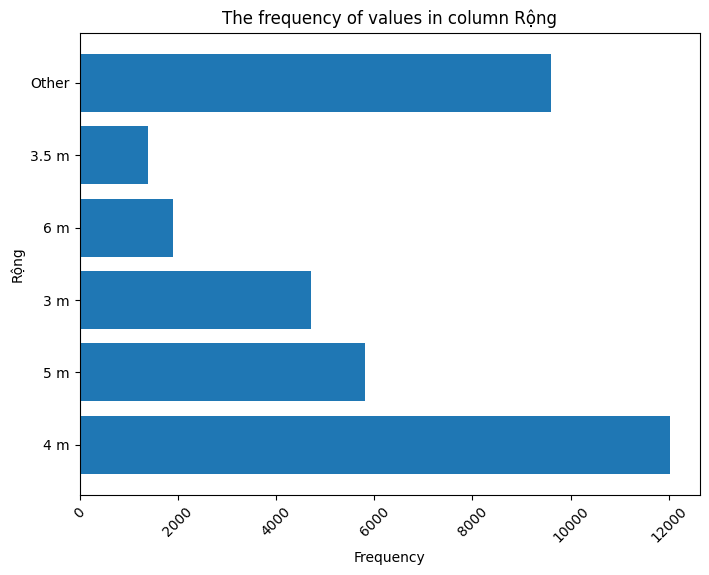


Column 12: Giá/m2
Distinct Values: 8345
Distict values (%):  10.118325978371564
Missing values: 12


/tmp/ipykernel_11188/911489053.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Missing values:", missing[i])


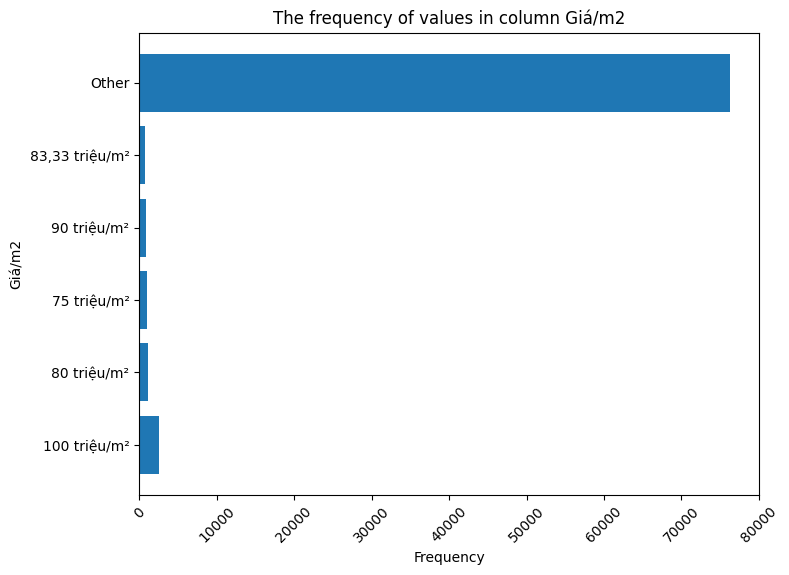

In [11]:
# Iterate over the columns
#Print each column's name and the basic information of it
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))
print("")

i = 0
while i < len(df.columns):
    print("Column " + str(i+1) +":", df.columns[i])

    # Get the distinct value of the column
    distinct = df[df.columns[i]].unique()
    print("Distinct Values:", len(distinct) - 1)
        
    # Get the distinc values as a percentage
    total_count = df[df.columns[i]].count()
    distinct_count = len(distinct)
    distinct_percentage = (distinct_count / total_count) * 100
    print("Distict values (%): ", distinct_percentage)
            
    # Get the missing values in each column
    missing = df.isnull().sum()
    print("Missing values:", missing[i])

    # Visualize the frequency of each value
    # Calculate the frequency of each value in the column
    value_counts = df[df.columns[i]].value_counts()
    def plot_top_values(df, column, max_values=5):
        if len(value_counts) <= max_values:
            plt.figure(figsize=(8, 6))
            plt.barh(value_counts.index, value_counts.values)
            plt.ylabel(column)
            plt.xlabel('Frequency')
            plt.title(f'The frequency of values in column {column}')
            plt.xticks(rotation=45)
            plt.show()
        else:
            # Get the top 'max_values' most prevalent values
            top_values = value_counts.head(max_values)
            top_values = top_values.sort_values(ascending=False)
            # Get the sum of frequencies for values not in the top 'max_values'
            other_count = value_counts[max_values:].sum()
            # Combine the top 'max_values' with 'other' category
            top_values['Other'] = other_count
            # Plot the bar chart
            plt.figure(figsize=(8, 6))
            plt.barh(top_values.index, top_values.values)
            plt.ylabel(column)
            plt.xlabel('Frequency')
            plt.title(f'The frequency of values in column {column}') 
            plt.xticks(rotation=45)
            plt.show()


       

    # Call the function to plot the bar chart for each variable
    plot_top_values(df, df.columns[i])       


   
    i+=1
    print("")





#### II. Data Cleansing

In [12]:
# Check for Duplicates:
print("Number of duplicates:", df.duplicated().sum())
# Removing Duplicates:
new_df = df.drop_duplicates()
# Check for NaN
print("Not available values:")
print(df.isna().sum())
print(" ")
# Remove rows with missing values:
new_df = new_df.dropna()
print("DataFrame after removing all NaNs and Duplicates:")
new_df


Number of duplicates: 815
Not available values:
Ngày                   0
Địa chỉ               47
Quận                   1
Huyện                 47
Loại hình nhà ở       31
Giấy tờ pháp lý    28886
Số tầng            46097
Số phòng ngủ          38
Diện tích              1
Dài                62669
Rộng               47051
Giá/m2                12
dtype: int64
 
DataFrame after removing all NaNs and Duplicates:


,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
2,8/5/2020,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
15,8/5/2020,"Đường Bồ Đề, Phường Bồ Đề, Quận Long Biên, Hà Nội",Quận Long Biên,Phường Bồ Đề,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,52 m²,12 m,4.2 m,"93,27 triệu/m²"
24,8/4/2020,"Đường Tố Hữu, Phường La Khê, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường La Khê,"Nhà mặt phố, mặt tiền",Đã có sổ,5,5 phòng,90 m²,18 m,5 m,"108,89 triệu/m²"
29,8/4/2020,"180/61/5, Đường Tây Mỗ, Phường Tây Mỗ, Quận Na...",Quận Nam Từ Liêm,Phường Tây Mỗ,"Nhà ngõ, hẻm",Đã có sổ,4,3 phòng,32 m²,6.6 m,4.5 m,"60,94 triệu/m²"
34,8/4/2020,"Đường Tả Thanh Oai, Xã Tả Thanh Oai, Huyện Tha...",Huyện Thanh Trì,Xã Tả Thanh Oai,"Nhà ngõ, hẻm",Đã có sổ,3,2 phòng,42 m²,11 m,4 m,"29,76 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...
82355,4/17/2020,"101b-c4, ngõ 231, Đường Tân Mai, Phường Tân Ma...",Quận Hoàng Mai,Phường Tân Mai,"Nhà ngõ, hẻm",Đã có sổ,2,2 phòng,37 m²,13 m,3 m,"43,24 triệu/m²"
82356,4/17/2020,"Đường Nguyễn Trãi, Phường Thượng Đình, Quận Th...",Quận Thanh Xuân,Phường Thượng Đình,"Nhà ngõ, hẻm",Đã có sổ,9,nhiều hơn 10 phòng,100 m²,16 m,6 m,115 triệu/m²
82359,4/17/2020,"Đường Hồ Đắc Di, Phường Nam Đồng, Quận Đống Đa...",Quận Đống Đa,Phường Nam Đồng,"Nhà mặt phố, mặt tiền",Đã có sổ,5,4 phòng,80 m²,14 m,5 m,"262,5 triệu/m²"
82361,4/15/2020,"Đường Khâm Thiên, Phường Khâm Thiên, Quận Đống...",Quận Đống Đa,Phường Khâm Thiên,"Nhà mặt phố, mặt tiền",Đã có sổ,3,5 phòng,89 m²,20 m,4 m,"258,43 triệu/m²"


In [13]:
# Fixing High Cardinality
# High cardinality check
dist_counts = new_df['Quận'].value_counts()
print("Access the impact of high cardinality:")
print(dist_counts)
print(" ")
# Define threshold for high cardinality and cleanse
new_df2 = new_df
threshold = 1000
car_fix = dist_counts[dist_counts <= threshold].index
new_df2['Quận'] = new_df2['Quận'].apply(lambda x: 'Other' if x in car_fix else x)
aft_threshold = new_df2['Quận'].value_counts()
print("After threshold:")
print(aft_threshold)

Access the impact of high cardinality:
Quận
Quận Hà Đông         1612
Quận Đống Đa         1580
Quận Thanh Xuân      1440
Quận Hoàng Mai       1249
Quận Cầu Giấy        1115
Quận Hai Bà Trưng    1055
Quận Long Biên        761
Quận Ba Đình          691
Quận Nam Từ Liêm      554
Quận Tây Hồ           540
Quận Bắc Từ Liêm      259
Huyện Thanh Trì       202
Huyện Hoài Đức        154
Quận Hoàn Kiếm         92
Huyện Gia Lâm          49
Huyện Đông Anh         21
Huyện Thanh Oai        17
Thị xã Sơn Tây          9
Huyện Đan Phượng        7
Huyện Thường Tín        6
Huyện Sóc Sơn           6
Huyện Quốc Oai          5
Huyện Chương Mỹ         4
Huyện Mê Linh           3
Huyện Thạch Thất        3
Huyện Phúc Thọ          1
Name: count, dtype: int64
 
After threshold:
Quận
Other                3384
Quận Hà Đông         1612
Quận Đống Đa         1580
Quận Thanh Xuân      1440
Quận Hoàng Mai       1249
Quận Cầu Giấy        1115
Quận Hai Bà Trưng    1055
Name: count, dtype: int64


In [14]:
# Fixing high cardinality phase 2
# Accessing the impact of high cardinality
hcount = new_df2['Huyện'].value_counts()
print(hcount)
# Defining threshold and cleanse
df_cleansed = new_df2
threshold = 100
car_fix2 = hcount[hcount <= threshold].index
df_cleansed['Huyện'] = df_cleansed['Huyện'].apply(lambda x: 'Other' if x in car_fix2 else x)
hcount2 = df_cleansed['Huyện'].value_counts()
print("After threshold (2):")
print(hcount2)

Huyện
Phường Khương Trung    312
Phường Yên Nghĩa       264
Phường Khương Đình     236
Phường Yên Hoà         226
Phường Nhân Chính      210
                      ... 
Phường Hàng Đào          1
Xã Phương Trung          1
Xã Duyên Thái            1
Xã Văn Bình              1
Xã Phù Đổng              1
Name: count, Length: 243, dtype: int64
After threshold (2):
Huyện
Other                   5270
Phường Khương Trung      312
Phường Yên Nghĩa         264
Phường Khương Đình       236
Phường Yên Hoà           226
Phường Nhân Chính        210
Phường La Khê            205
Phường Ô Chợ Dừa         204
Phường Láng Hạ           198
Phường Minh Khai         198
Phường Khương Mai        195
Phường Văn Quán          183
Phường Quang Trung       178
Phường Định Công         175
Phường Mỹ Đình 1         173
Phường Nghĩa Đô          166
Phường Trung Liệt        159
Phường Mai Dịch          154
Phường Bạch Mai          154
Phường Tân Mai           151
Phường Đại Kim           142
Phường Lĩnh Nam       

In [15]:
# Delete all rows with NaNs
for index, row in df_cleansed.iterrows():
    if row['Quận'] == 'Other' or row['Huyện'] == 'Other':
        df_cleansed.drop(index, inplace=True)

df_cleansed = df_cleansed.reset_index(drop=True)


In [16]:
print("Cleansed DataFrame:")
df_cleansed

Cleansed DataFrame:


,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,8/5/2020,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
1,8/4/2020,"Đường Tố Hữu, Phường La Khê, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường La Khê,"Nhà mặt phố, mặt tiền",Đã có sổ,5,5 phòng,90 m²,18 m,5 m,"108,89 triệu/m²"
2,8/4/2020,"Đường Khương Trung, Phường Khương Trung, Quận ...",Quận Thanh Xuân,Phường Khương Trung,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,38 m²,10 m,3 m,"68,42 triệu/m²"
3,8/4/2020,"văn phu, Phường Kiến Hưng, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường Kiến Hưng,Nhà biệt thự,Đang chờ sổ,3,5 phòng,200 m²,22 m,9 m,"47,25 triệu/m²"
4,8/4/2020,"Đường Chùa Láng, Phường Láng Hạ, Quận Đống Đa,...",Quận Đống Đa,Phường Láng Hạ,"Nhà mặt phố, mặt tiền",Đã có sổ,6,nhiều hơn 10 phòng,70 m²,17 m,4 m,"114,29 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...
5149,5/17/2020,"Đường Tân Mai, Phường Tân Mai, Quận Hoàng Mai,...",Quận Hoàng Mai,Phường Tân Mai,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,38 m²,9 m,4 m,"92,11 triệu/m²"
5150,4/21/2020,"25, 25 Đường Vũ Ngọc Phan, Phường Láng Hạ, Quậ...",Quận Đống Đa,Phường Láng Hạ,Nhà biệt thự,Đã có sổ,5,3 phòng,158 m²,16.5 m,9.6 m,"246,84 triệu/m²"
5151,4/21/2020,"Đường Hoàng Văn Thái, Phường Khương Trung, Quậ...",Quận Thanh Xuân,Phường Khương Trung,"Nhà ngõ, hẻm",Đã có sổ,5,5 phòng,45 m²,11 m,4 m,"104,44 triệu/m²"
5152,4/19/2020,"Đường Ngụy Như Kon Tum, Phường Nhân Chính, Quậ...",Quận Thanh Xuân,Phường Nhân Chính,Nhà phố liền kề,Đã có sổ,6,6 phòng,65 m²,13 m,5 m,"192,31 triệu/m²"


#### III. Data Reduction

Index(['Ngày', 'Địa chỉ', 'Quận', 'Huyện', 'Loại hình nhà ở',
       'Giấy tờ pháp lý', 'Số tầng', 'Số phòng ngủ', 'Diện tích', 'Dài',
       'Rộng', 'Giá/m2'],
      dtype='object')


Text(69.22222222222221, 0.5, 'Variable 1')

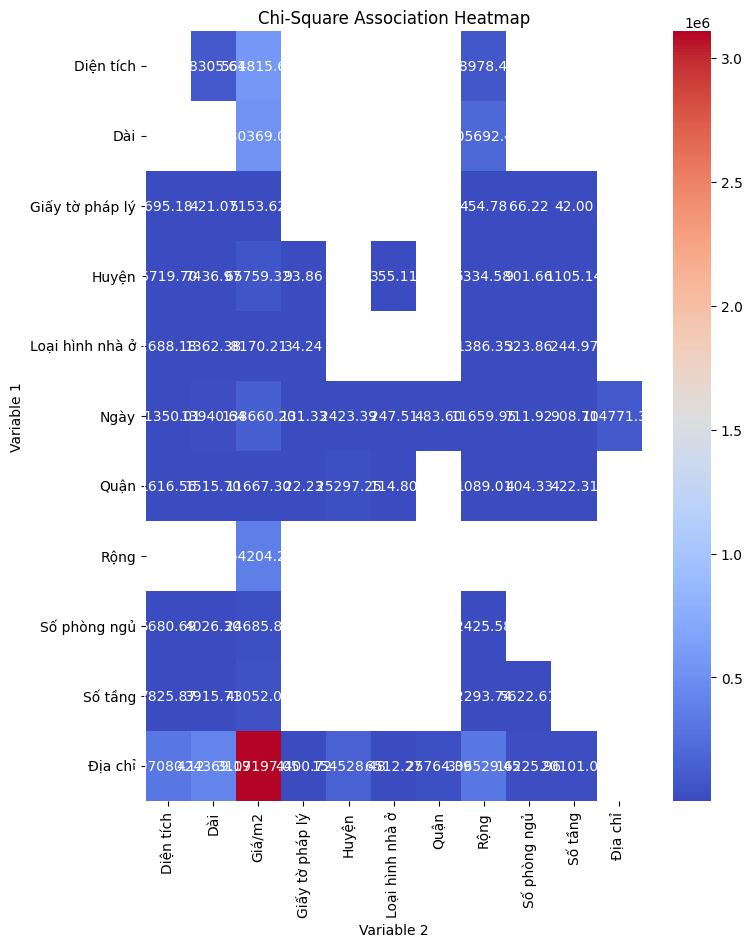

In [17]:
# Check for correlation
from scipy.stats import chi2_contingency

# Function to calculate chi-square test for a pair of categorical variables
def chi_square_test(df_cleansed, col1, col2):
    cross_tab = pd.crosstab(df_cleansed[col1], df_cleansed[col2])
    chi2, p, dof, ex = chi2_contingency(cross_tab)
    return chi2, p

# List to store associations
associations = []

# Loop through all combinations of columns
df_cleansed = df_cleansed.astype('category')
categorical_columns = df_cleansed.select_dtypes(include='category').columns
print(categorical_columns)
for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        col1 = categorical_columns[i]
        col2 = categorical_columns[j]
        chi2_val, p_val = chi_square_test(df_cleansed, col1, col2)
        associations.append((col1, col2, chi2_val, p_val))

# Create a DataFrame to display the results
association_df = pd.DataFrame(associations, columns=['Variable 1', 'Variable 2', 'Chi-Square', 'P-Value'])

# Export DataFrame to a CSV file
association_df.to_csv('associations.csv', index = False)

# Create a pivot table for heatmap
heatmap_data = association_df.pivot_table(index='Variable 1', columns='Variable 2', values='Chi-Square')

# Create a heatmap using seaborn 
plt.figure(figsize=(8, 10))
sb.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')

# Add title and labels
plt.title('Chi-Square Association Heatmap')
plt.xlabel('Variable 2')
plt.ylabel('Variable 1')

In [18]:
# Remove all columns that are irrelevant to the target variable (house price)
col_to_remove = ['Ngày', 'Rộng', 'Huyện', 'Ngày', 'Dài', 'Diện tích','Huyện']
df_cleansed.drop(col_to_remove, axis=1, inplace=True)
df_cleansed = pd.DataFrame(df_cleansed)
df_cleansed

,Địa chỉ,Quận,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Giá/m2
0,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,65 triệu/m²
1,"Đường Tố Hữu, Phường La Khê, Quận Hà Đông, Hà Nội",Quận Hà Đông,"Nhà mặt phố, mặt tiền",Đã có sổ,5,5 phòng,"108,89 triệu/m²"
2,"Đường Khương Trung, Phường Khương Trung, Quận ...",Quận Thanh Xuân,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,"68,42 triệu/m²"
3,"văn phu, Phường Kiến Hưng, Quận Hà Đông, Hà Nội",Quận Hà Đông,Nhà biệt thự,Đang chờ sổ,3,5 phòng,"47,25 triệu/m²"
4,"Đường Chùa Láng, Phường Láng Hạ, Quận Đống Đa,...",Quận Đống Đa,"Nhà mặt phố, mặt tiền",Đã có sổ,6,nhiều hơn 10 phòng,"114,29 triệu/m²"
...,...,...,...,...,...,...,...
5149,"Đường Tân Mai, Phường Tân Mai, Quận Hoàng Mai,...",Quận Hoàng Mai,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,"92,11 triệu/m²"
5150,"25, 25 Đường Vũ Ngọc Phan, Phường Láng Hạ, Quậ...",Quận Đống Đa,Nhà biệt thự,Đã có sổ,5,3 phòng,"246,84 triệu/m²"
5151,"Đường Hoàng Văn Thái, Phường Khương Trung, Quậ...",Quận Thanh Xuân,"Nhà ngõ, hẻm",Đã có sổ,5,5 phòng,"104,44 triệu/m²"
5152,"Đường Ngụy Như Kon Tum, Phường Nhân Chính, Quậ...",Quận Thanh Xuân,Nhà phố liền kề,Đã có sổ,6,6 phòng,"192,31 triệu/m²"


#### IV. Data transformation

In [19]:
# Using one-hot encoding to transframe the whole DataFrame
df_encoded = df_cleansed.apply(lambda x: pd.factorize(x)[0])
df_encoded

,Địa chỉ,Quận,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Giá/m2
0,0,0,0,0,0,0,0
1,1,1,1,0,1,1,1
2,2,2,0,0,0,0,2
3,3,1,2,1,2,1,3
4,4,3,1,0,3,2,4
...,...,...,...,...,...,...,...
5149,29,4,0,0,1,0,51
5150,1531,3,2,0,1,4,1923
5151,71,2,0,0,1,1,613
5152,480,2,3,0,3,6,964


Text(69.22222222222221, 0.5, 'Variable 1')

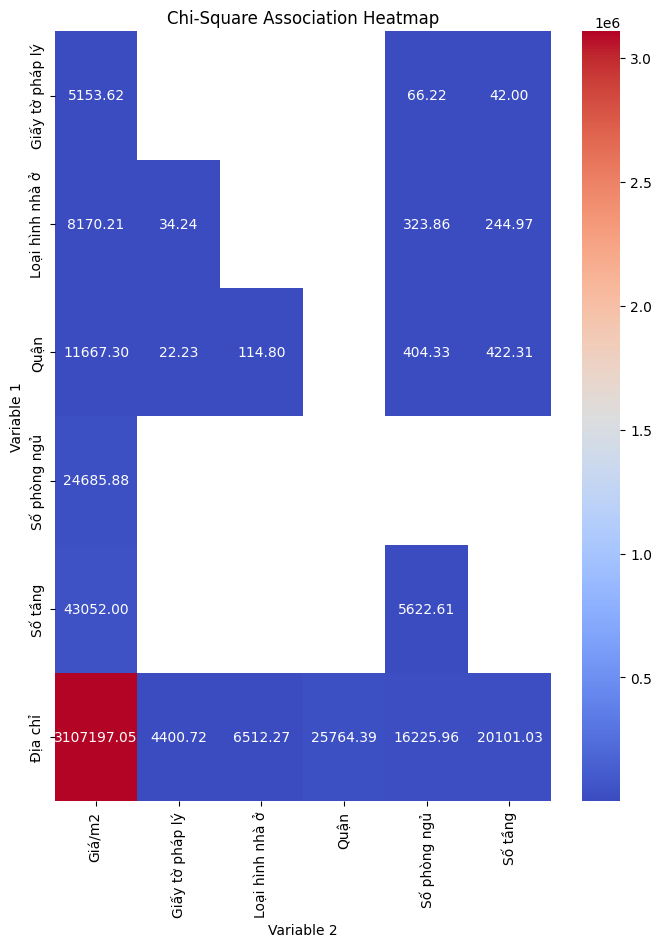

In [20]:
# Visualize the assiciations of variables again to check the cleansing output

# List to store associations
associations2 = []

# Loop through all combinations of columns
df_encoded = df_encoded.astype('category')
categorical_col = df_encoded.select_dtypes(include='category').columns
for i in range(len(categorical_col)):
    for j in range(i+1, len(categorical_col)):
        col1 = categorical_col[i]
        col2 = categorical_col[j]
        chi2_val, p_val = chi_square_test(df_encoded, col1, col2)
        associations2.append((col1, col2, chi2_val, p_val))

# Create a DataFrame to display the results
association_df2 = pd.DataFrame(associations2, columns=['Variable 1', 'Variable 2', 'Chi-Square', 'P-Value'])

# Export DataFrame to a CSV file
association_df2.to_csv('associations.csv', index = False)

association_df2

# Create a pivot table for heatmap
heatmap_data2 = association_df2.pivot_table(index='Variable 1', columns='Variable 2', values='Chi-Square')

# Create a heatmap using seaborn 
plt.figure(figsize=(8, 10))
sb.heatmap(heatmap_data2, annot=True, cmap='coolwarm', fmt='.2f')

# Add title and labels
plt.title('Chi-Square Association Heatmap')
plt.xlabel('Variable 2')
plt.ylabel('Variable 1')

# Cái heatmap màu đậm phết nên chắc cũng okela anh ạ :))


#### V. Data Enrichment (Skip)

#### VI. Data Validation (Skip)